In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [2]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

def linear(x, m, b):
    return m * x + b

def gsin(theta, g):
    return g*np.sin(np.radians(theta))

def hiperbola_mass (m, m2, F):
    a = F/(m2+m)
    return a

def hiperbola(x, a, b, c):
    return a/(b+x)+c*x

def periodo(l, g):
    return 2*np.pi*np.sqrt(l/g)

def periodo_square(l, g):
    return (2*np.pi)**2 * l / g

In [3]:
# define function to clean up data 

# Clean data by removing NaN and Inf values
def clean_data(x, y):
    # Convert to numpy arrays if they're not already
    x_np = np.array(x)
    y_np = np.array(y)
    
    # Create mask for valid values (not NaN or Inf)
    mask = ~np.isnan(x_np) & ~np.isnan(y_np) & ~np.isinf(x_np) & ~np.isinf(y_np)
    
    # Apply mask
    return x_np[mask], y_np[mask]

In [4]:
def load_excel_to_df(data):
    """
    Loads an Excel file named "{data}.xlsx" (without skiprows=1 for non-tracker excels) into a dataframe.
    The dataframe is assigned to a global variable named df_{data}.
    
    Parameters:
        data (str): The base name of the Excel file (without ".xlsx").
    """
    filename = f"{data}.xlsx"
    try:
        df = pd.read_excel(filename)
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        exit()
    globals()[f"df_{data}"] = df
    return df

# 1) T vs M

In [21]:
df_TvsM = load_excel_to_df("T_vs_m")
df_TvsM

,m,t,T
0,14,19.83,1.983
1,20,19.52,1.952
2,26,19.84,1.984
3,32,19.63,1.963
4,38,19.69,1.969
5,44,19.77,1.977
6,50,19.60,1.960


In [18]:
m = df_TvsM['m'].to_numpy()
T_m = df_TvsM['T'].to_numpy()
T_avg = df_TvsM['T'].mean()
print(f"Average T: {T_avg:.2f} s")

Average T: 1.97 s


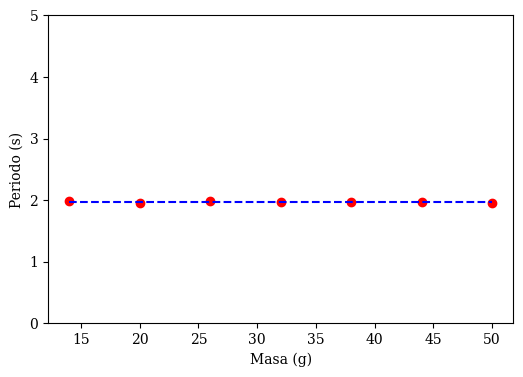

In [20]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(m, T_m, marker='o', markersize=6 , linestyle='None', color='r')
plt.hlines(T_avg, xmin=min(m), xmax=max(m), color='blue', linestyle='--', label='T promedio')



# Add labels, title, legend (if needed)
plt.xlabel("Masa (g)")
plt.ylabel("Periodo (s)")
# plt.legend()  # Show the legend

plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("T-vs-m.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

# 2) 
# 2.1) T vs L

In [23]:
df_TvsL = load_excel_to_df("T_vs_L")
df_TvsL

,L,t,T
0,0.3,10.34,1.034
1,0.4,12.04,1.204
2,0.5,13.81,1.381
3,0.6,15.00,1.500
4,0.7,16.56,1.656
5,0.8,17.40,1.740
6,0.9,18.64,1.864
7,1.0,19.90,1.990
8,1.1,20.78,2.078
9,1.2,21.46,2.146


In [ ]:
L = df_TvsL["L"].to_numpy()
T_L = df_TvsL["T"].to_numpy()

Period function g: [10.20330858]


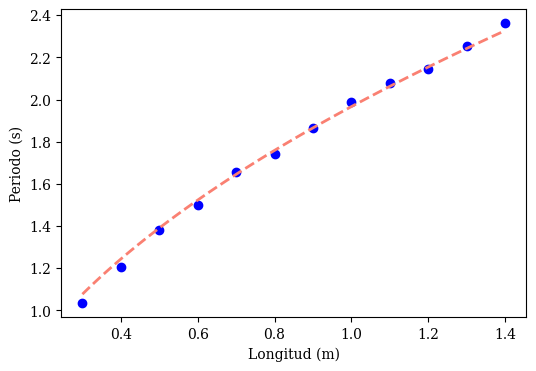

In [10]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(L, T_L, marker='o', markersize=6 , linestyle='None', color='b')

popt, pcov = opt.curve_fit(periodo, L, T_L)
print("Period function g:", popt)

longitud = np.linspace(min(L), max(L), 100)
y = periodo(longitud, *popt)
plt.plot(longitud, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste hiperbola')


# Add labels, title, legend (if needed)
plt.xlabel("Longitud (m)")
plt.ylabel("Periodo (s)")
# plt.legend()  # Show the legend

#plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("T-vs-L.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

# 2.2) $T^2$ vs $L$

Period function g: [10.13647333]


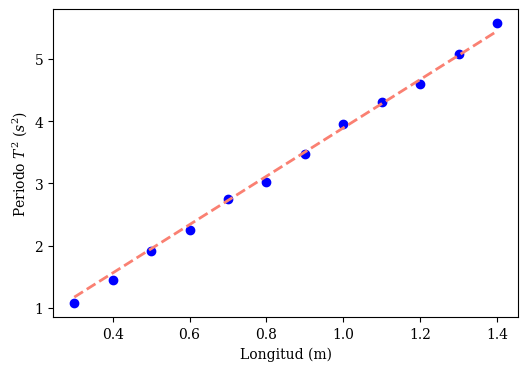

In [11]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(L, T_L**2, marker='o', markersize=6 , linestyle='None', color='b')

popt, pcov = opt.curve_fit(periodo_square, L, T_L**2)
print("Period function g:", popt)

longitud = np.linspace(min(L), max(L), 100)
y = periodo_square(longitud, *popt)
plt.plot(longitud, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste hiperbola')


# Add labels, title, legend (if needed)
plt.xlabel("Longitud (m)")
plt.ylabel("Periodo $T^2$ ($s^2$)")
# plt.legend()  # Show the legend

#plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("T_sq-vs-L.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

# 3.3) $\ln T vs \ln L$

<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
C:\Users\RenzoStefanoHillmann\AppData\Local\Temp\ipykernel_21528\4172630685.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\ln L$")
C:\Users\RenzoStefanoHillmann\AppData\Local\Temp\ipykernel_21528\4172630685.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\ln T$")


Slope and intercept [0.53112222 0.67904984]


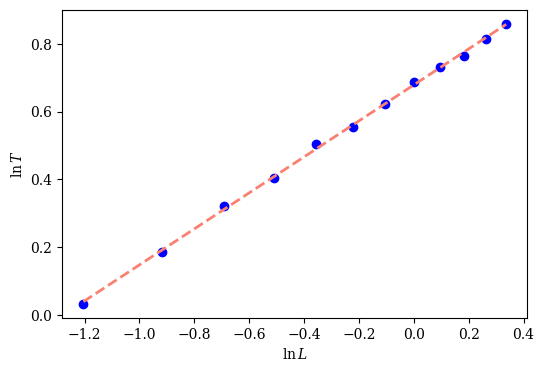

In [12]:
lnL = np.log(L)
lnT = np.log(T_L)


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(lnL, lnT, marker='o', markersize=6 , linestyle='None', color='b')

popt, pcov = opt.curve_fit(linear, lnL, lnT)
print("Slope and intercept", popt)

longitud = np.linspace(min(lnL), max(lnL), 100)
y = linear(longitud, *popt)
plt.plot(longitud, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste hiperbola')


# Add labels, title, legend (if needed)
plt.xlabel("$\ln L$")
plt.ylabel("$\ln T$")
# plt.legend()  # Show the legend

#plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("lnT-vs-lnL.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

# 3) $T$ vs $\theta$

In [13]:
df_TvsTheta = load_excel_to_df("T_vs_Theta")

In [22]:
theta = df_TvsTheta['theta'].to_numpy()
T_theta = df_TvsTheta['T'].to_numpy() 
T_theta

array([1.63 , 1.64 , 1.66 , 1.688, 1.7  , 1.732, 1.78 , 1.814, 1.873])

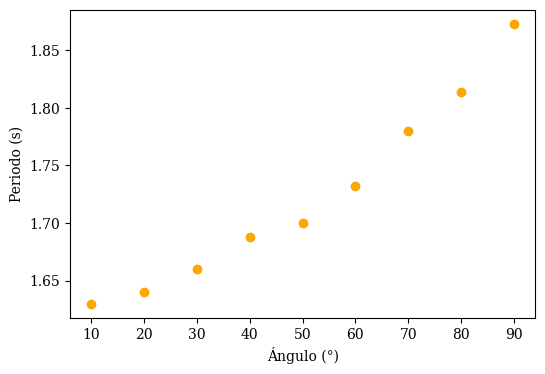

In [15]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12

# Add the new set of points to the existing plot
plt.plot(theta, T_theta, marker='o', markersize=6 , linestyle='None', color='orange')


# Add labels, title, legend (if needed)
plt.xlabel("Ángulo (°)")
plt.ylabel("Periodo (s)")
# plt.legend()  # Show the legend

#plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("T-vs-Theta.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()